In [1]:
# import libraries
import tensorflow as tf
import keras
import numpy as np
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

In [2]:
# buat nampung dimensions dari setiap gambar
img_rows, img_cols = 75, 75
# buat nampung path kta
data_path = './dataset/'
# buat nampung label
x, y = [], []
# sebagai label kita 0, 1, 2, semisal 0 buat shoes, 1 buat sandals etc
counter = 0
# ambil smua data name folder dari directory kita
classes = os.listdir(data_path)


In [3]:
# stiap classes yang ada di data path, dan stiap images yang ada disana, labelnya
# kita kasih sesuai counter
# dan kita proses menggunakan tensorflow (dari img to array)
for class_path in os.listdir(data_path):
    for img_path in os.listdir(f"{data_path}{class_path}"):
        path = f"{data_path}{class_path}/{img_path}"
        label = counter
        image = tf.keras.preprocessing.image.load_img(path, target_size=(img_rows, img_cols))
        image = tf.keras.preprocessing.image.img_to_array(image)
        x.append(image)
        y.append(label)
    counter += 1

x = np.array(x)
y = np.array(y)

In [4]:
# dijadikan float supaya process model kita calculationnya lebih bagus
# also bagi 255 supaya [0, 255] to [0, 1] (normalisasi).
x = x.astype('float32') / 255.0

# 80 : 10 : 10
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=420)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=420)

y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_val = keras.utils.to_categorical(y_val, num_classes=3)
y_test = keras.utils.to_categorical(y_test, num_classes=3)

print(X_train.shape)

(5492, 75, 75, 3)


In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(img_rows, img_cols, 3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(keras.layers.Conv2D(64, (5,5), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(keras.layers.Conv2D(128, (5,5), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(keras.layers.Dropout(0.2))  
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(3, activation="softmax"))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['Accuracy'])
history = model.fit(X_train, y_train, batch_size=120, validation_data=(X_val, y_val), epochs=10)

c:\Users\theo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 71, 71, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 35, 35, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 31, 31, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 463,683 (1.77 MB)

 Trainable params: 463,683 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 200ms/step - Accuracy: 0.6169 - loss: 0.8369 - val_Accuracy: 0.8035 - val_loss: 0.5269
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - Accuracy: 0.8094 - loss: 0.4939 - val_Accuracy: 0.8632 - val_loss: 0.3599
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - Accuracy: 0.8484 - loss: 0.4072 - val_Accuracy: 0.8748 - val_loss: 0.3398
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step - Accuracy: 0.8793 - loss: 0.3421 - val_Accuracy: 0.8967 - val_loss: 0.2799
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - Accuracy: 0.8984 - loss: 0.2890 - val_Accuracy: 0.9112 - val_loss: 0.2430
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - Accuracy: 0.9149 - loss: 0.2579 - val_Accuracy: 0.9229 - val_loss: 0.2210
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - Accuracy: 0.9259 - loss: 0.2236 - val_Accuracy: 0.9214 - val_loss: 0.2464
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - Accuracy: 0.9208 - loss: 0.2232 - val_Accuracy: 0

In [6]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions from one-hot encoding to class labels
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Mapping class indices back to their respective labels (you can modify this based on your dataset)
label_map = {0: 'buildings', 1: 'forest', 2: 'glacier'}

# Print actual and predicted labels for each test sample
for i in range(20):  # Limit to first 20 samples for display
    actual_label = label_map[actual_classes[i]]
    predicted_label = label_map[predicted_classes[i]]
    print(f"Sample {i}: Actual Label: {actual_label}, Predicted Label: {predicted_label}")

    

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Sample 0: Actual Label: glacier, Predicted Label: forest
Sample 1: Actual Label: forest, Predicted Label: forest
Sample 2: Actual Label: glacier, Predicted Label: glacier
Sample 3: Actual Label: buildings, Predicted Label: buildings
Sample 4: Actual Label: glacier, Predicted Label: glacier
Sample 5: Actual Label: forest, Predicted Label: forest
Sample 6: Actual Label: glacier, Predicted Label: glacier
Sample 7: Actual Label: buildings, Predicted Label: buildings
Sample 8: Actual Label: buildings, Predicted Label: buildings
Sample 9: Actual Label: forest, Predicted Label: forest
Sample 10: Actual Label: forest, Predicted Label: forest
Sample 11: Actual Label: buildings, Predicted Label: buildings
Sample 12: Actual Label: buildings, Predicted Label: buildings
Sample 13: Actual Label: buildings, Predicted Label: buildings
Sample 14: Actual Label: forest, Predicted Label: forest
Sample 15: Actual Label: forest, Predicted Label: forest
Sample 16: Actu

In [7]:

score = model.evaluate(X_test, y_test)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - Accuracy: 0.9320 - loss: 0.2256
Test Loss: 0.22699490189552307
Test Accuracy: 0.9228529930114746


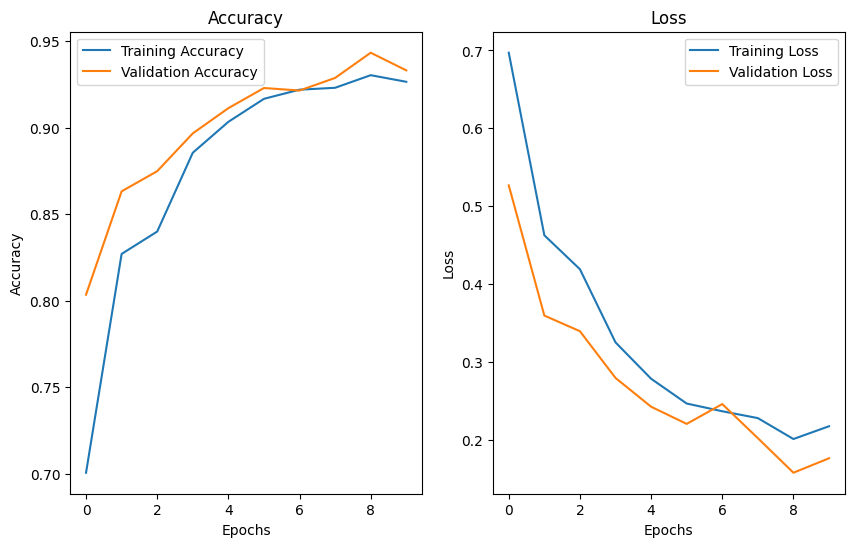

In [8]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(history.history['Accuracy'], label='Training Accuracy')
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [9]:
model.save('model.h5')